In [10]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# Modelo base

Como se busca un modelo de regresión, realizaremos una regresión lineal sencilla para obtener el modelo base

In [3]:
# Importamos los datos

train = pd.read_csv('../data/processed/train_tratado.csv')
train.columns

Index(['Unnamed: 0', 'id', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'Cpu power', 'Intel Core i3', 'Intel Core i5',
       'Intel Core i7', 'Intel Celeron Dual Core', 'Intel Pentium Quad Core',
       'A4', 'A6', 'A8', 'A10', 'A12', 'AMD Radeon', 'Nvidia GeForce',
       'Nvidia Quadro', 'Intel HD Graphics', 'AMD FirePro',
       'Intel Iris Graphics'],
      dtype='object')

## Definición de variables

In [4]:
# Nombramos a 'X' y a 'y'. Quitamos las variables que no son numéricas

X = train[['Inches', 'Ram', 'Memory', 'Weight',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12']]

y = train['Price_euros']

In [6]:
# Separamos X_train y X_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 30)
(183, 30)
(729,)
(183,)


## Composición del modelo

In [7]:
from sklearn.linear_model import LinearRegression

#creating LinearRegression Object
model = LinearRegression()

#Training the Data Model
model.fit(X_train, y_train)

LinearRegression()

## Evaluación del modelo

c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


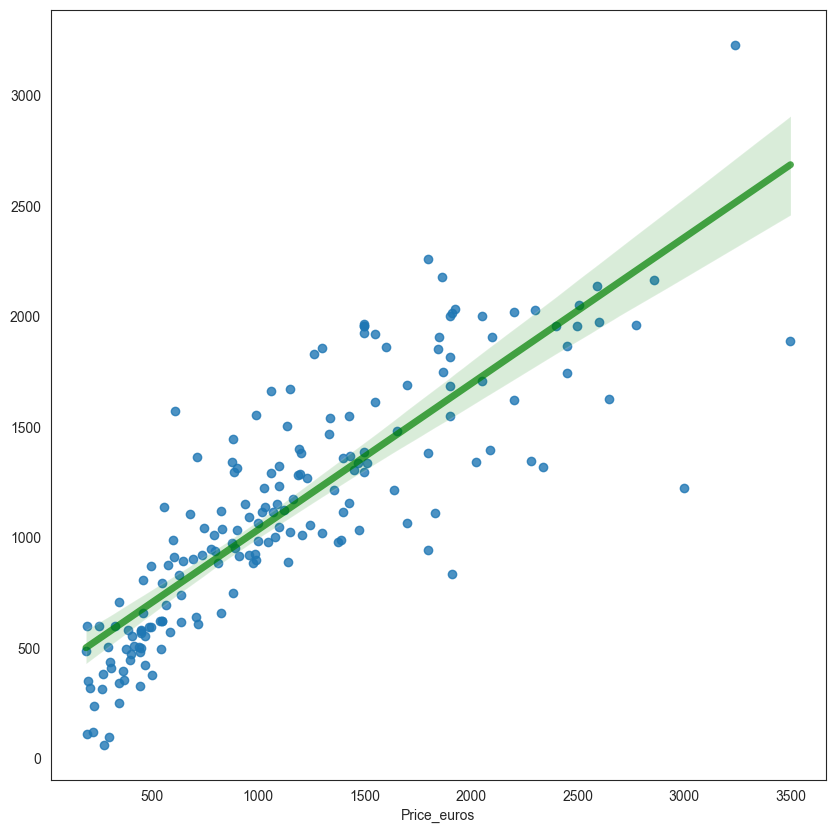

In [8]:
# Dispersión de las predicciones

plt.figure(figsize=(10,10))
sns.set_style('white')
sns.regplot(y_test, model.predict(X_test), line_kws={"color":"green","alpha":0.7,"lw":5});

## Evaluación del modelo

In [11]:
from sklearn import metrics

# Calculamos los errores
print('Train MAE:', metrics.mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE:', metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("")
print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train, model.predict(X_train)))
print('Test MAPE:', metrics.mean_absolute_percentage_error(y_test, model.predict(X_test)))
print("")
print('Train MSE:', metrics.mean_squared_error(y_train, model.predict(X_train)))
print('Test MSE:', metrics.mean_squared_error(y_test, model.predict(X_test)))
print("")
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print("")
print('Train score', model.score(X_train, y_train))
print('Test score', model.score(X_test, y_test))

Train MAE: 266.09339362844696
Test MAE: 266.06475461600843

Train MAPE: 0.25920196117022587
Test MAPE: 0.28012732524375633

Train MSE: 150874.95508686014
Test MSE: 145164.85001478292

Train RMSE: 388.4262543738002
Test RMSE: 381.00505247933773

Train score 0.7075299629877951
Test score 0.7051586206607003


## Feature importance
Los coeficientes son los parámetros del modelo y no deben tomarse como ningún tipo de importancia a menos que los datos estén normalizados.

In [12]:
intercept = model.intercept_
features = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
Workstation,625.292953
Windows 7,358.896169
Intel Core i7,261.366701
Touchscreen,220.912046
macOS,210.962704
Intel Core i5,145.420425
Weight,140.629567
Ultrabook,79.766370
Ram,74.184719
Mac OS X,34.289608


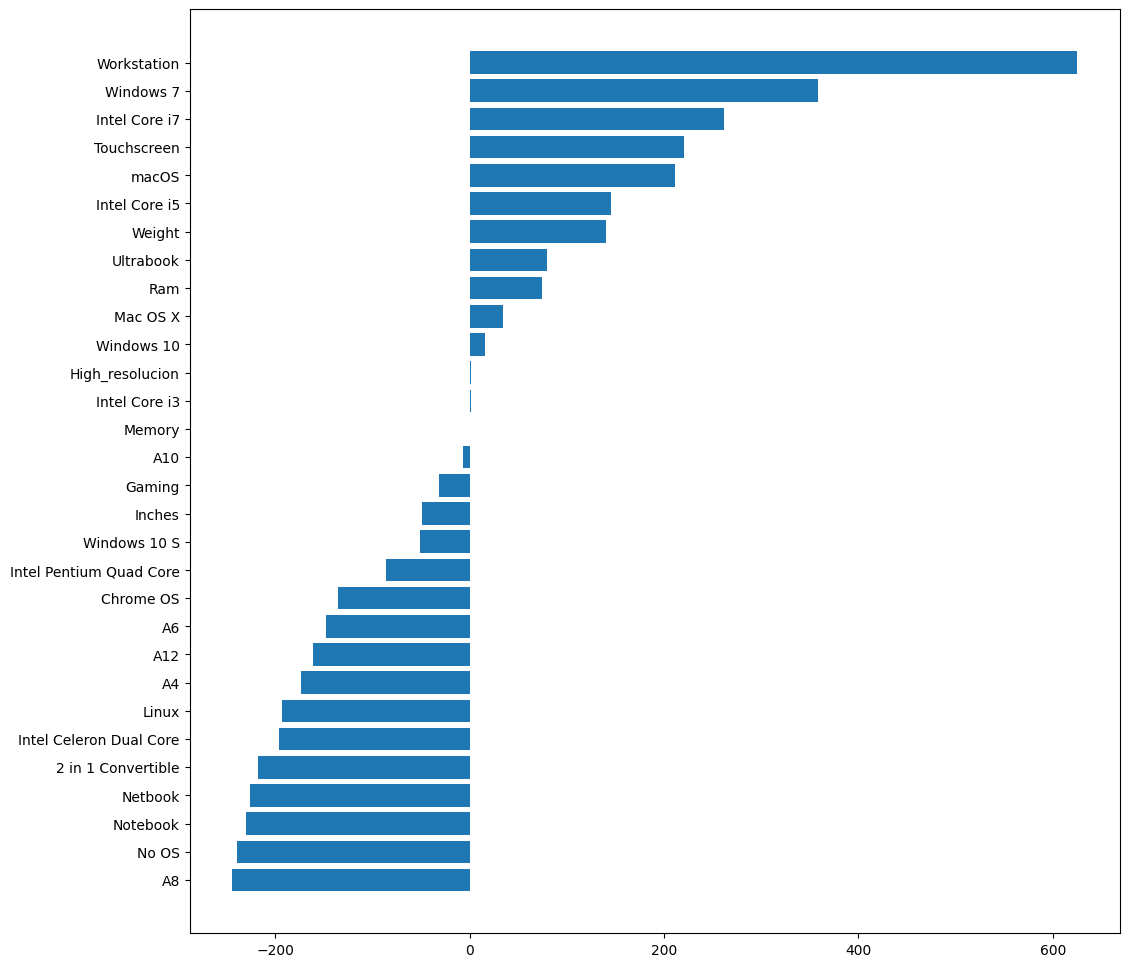

In [13]:
plt.figure(figsize=(12, 12))
features = features.sort_values('coefficient', ascending=True)
plt.barh(features.index, features.coefficient);

## Guardamos el modelo

In [17]:
import pickle

pickle.dump(model, open('../model/modelo_base', 'wb'))

## Conclusión

El RMSE, la métrica utilizada, es de 381,01.

Este será nuestro modelo base.